In [ ]:
import os
import csv
import re
dir_path=os.path.expanduser("~/DataMiner/hs_data")
all_text=[]
names=[]
for file in os.listdir(dir_path):
    print(file)
    with open(os.path.join(dir_path,file)) as csvfile:
        day=[]
        names.append(file)
        reader=csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in reader:
            rawrow=', '.join(row)
            print(rawrow)
            if "https" not in rawrow and len(rawrow)>5:
                #regex = re.compile('[^a-zA-Z]')
                regex = re.compile('[,\.!?–]')
                text = regex.sub('', rawrow)
                day.append(text)
        all_text.append(day)

2019-01-24 hs data.csv


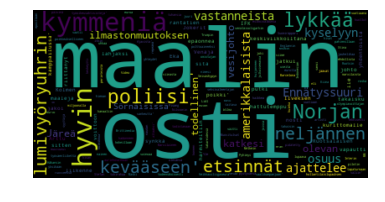

2019-01-23 hs data.csv


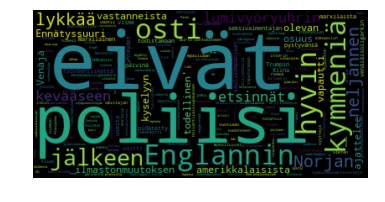

2019-01-25 hs data.csv


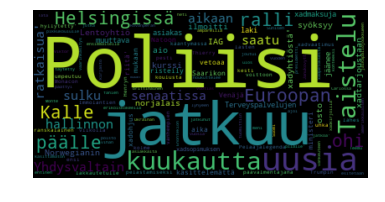

In [22]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


def makeWordmap(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


konjunktiot=['ei','nyt','oli','jo','se','ovat','on','ja','mutta','ole','se','vain', 'joka','sen','myös','ettei','sanoo','näyttää']
for day,name in zip(all_text,names):
    pure_text=day
    print(name)
    for k in konjunktiot:
        #pure_text= [a.replace(k,"") for a in pure_text]
        pure_text= [re.sub(r"\b%s\b" % k, "", a) for a in pure_text]
    makeWordmap(str(pure_text))